# Density plots

Visualizing the density plots of best result obtained by CGP.

In [58]:
from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

mutations = [
        (single_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        #(probabilistic_mutation, MatchSMStrategy),
       #(single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)
]

gems = [0, 5, 10]
columns = [10, 50, 100]


folders = [
    'scripts/symbolic_out_pypy///',
    'scripts/bin_class_out_10_pops//',
    'scripts/santa_fe_out/'
]

In [59]:
import os
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')
%matplotlib inline

from utils import load_data

In [67]:
kdes = []

for f_i, folder in enumerate(folders):
    hist_data = []
    names = []

    for index, ((mutation, strategy), gem, column) in enumerate(product(mutations, gems, columns)):
        file = os.path.join(folder,  f'{mutation.__name__}-{strategy.__name__}-gems{gem}-n_cols{column}.csv')
        raw, _, _, _ = load_data(file)
        
        if 'test_error' in raw[0].keys():
            gttr = lambda x: x['test_error']
        else:
            gttr = lambda x: x['best'].fitness
        
        
        if f_i > 0:
            [hist_data.append([gem, -gttr(x)]) for x in raw]
        else:
            [hist_data.append([gem, gttr(x)]) for x in raw]

    hist_data = pd.DataFrame(hist_data)
    hist_data.columns = ['gems', 'best']
    
    kdes.append(hist_data)

(180, 2)
(180, 2)
(180, 2)
(180, 2)
(180, 2)
(180, 2)
(180, 2)
(180, 2)
(180, 2)


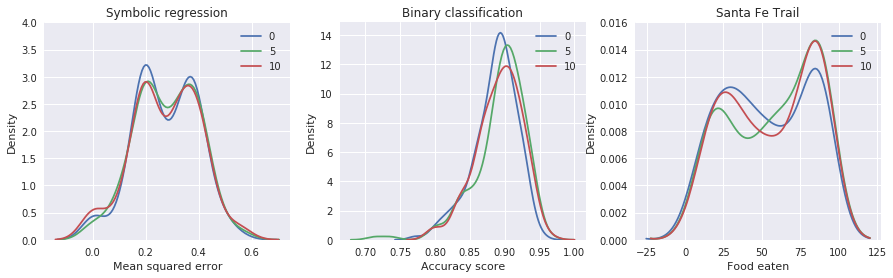

In [70]:
fig, axs = plt.subplots(1,3, figsize = (15,4))

# symbolic regression
axs[0].set_title('Symbolic regression')
axs[0].set_xlabel('Mean squared error')
axs[0].set_ylim(0, 4)

# binary classification
axs[1].set_title('Binary classification')
axs[1].set_xlabel('Accuracy score')

# santa fe
axs[2].set_title('Santa Fe Trail')
axs[2].set_xlabel('Food eaten')
axs[2].set_ylim(0, 0.016)

for index, data in enumerate(kdes):
    for x in [0, 5, 10]:
        print(data[data.gems==x].shape)
        sns.kdeplot(data[data.gems==x]['best'], label=x, shade=False, ax=axs[index])
        axs[index].set_ylabel('Density')
    
plt.savefig('figures/kdes.pdf', format='pdf', dpi=1000, bbox_inches='tight')